#Implement a Machine Learning Model for Regression Problem
#Air Pollution

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
#First 5 rows
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
#Last 5 rows
df.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
22963,22964,2012.0,8.0,14.0,19.0,27.0,14.0,21.0,1006.0,SE,44.70,0.0,0.0
22964,22965,2012.0,8.0,14.0,20.0,31.0,15.0,21.0,1006.0,SE,47.83,0.0,0.0
22965,22966,2012.0,8.0,14.0,21.0,33.0,15.0,20.0,1006.0,SE,49.62,0.0,0.0
22966,22967,2012.0,8.0,14.0,22.0,42.0,16.0,20.0,1006.0,SE,51.41,0.0,0.0
22967,22968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#shape of the dataset
df.shape

(43824, 13)

In [ ]:
#columns of the dataset
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

#Step1 : Data Preprocessing

In [ ]:
#TO check null values
df.isnull()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,False,False,False,False,False,False,False,False,False,False,False,False,False
43820,False,False,False,False,False,False,False,False,False,False,False,False,False
43821,False,False,False,False,False,False,False,False,False,False,False,False,False
43822,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#To handle sum of missing values
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [ ]:
#To know information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [ ]:
df.drop(columns=['No'],inplace=True)

In [ ]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

In [ ]:
#Handling Time series data
df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('timestamp', inplace=True)

In [ ]:
df.drop(columns=['year','month','day','hour'],inplace=True)

In [ ]:
df.columns

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41757 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   41757 non-null  float64
 1   DEWP    41757 non-null  int64  
 2   TEMP    41757 non-null  float64
 3   PRES    41757 non-null  float64
 4   cbwd    41757 non-null  object 
 5   Iws     41757 non-null  float64
 6   Is      41757 non-null  int64  
 7   Ir      41757 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.9+ MB


In [ ]:
df['cbwd'].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [ ]:
df['cbwd'].nunique()

4

In [ ]:
df['cbwd'].value_counts()

SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

In [ ]:
# Encoding Labels
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df['cbwd'] = lb.fit_transform(df['cbwd'])
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
o_Encoder = OneHotEncoder()


In [ ]:
df['cbwd'] = o_Encoder.fit_transform(df[['cbwd']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler


#Step 2 : Exploratory Data Analysis

In [ ]:
df.describe()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,1.663482,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,0.937802,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,3.000000,565.490000,27.000000,36.000000


In [ ]:
import scipy.stats as stats

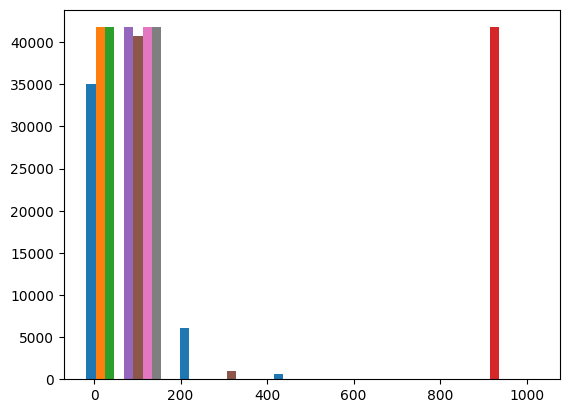

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.hist(df, bins=5)
plt.figure(figsize=(20,5))
plt.show()

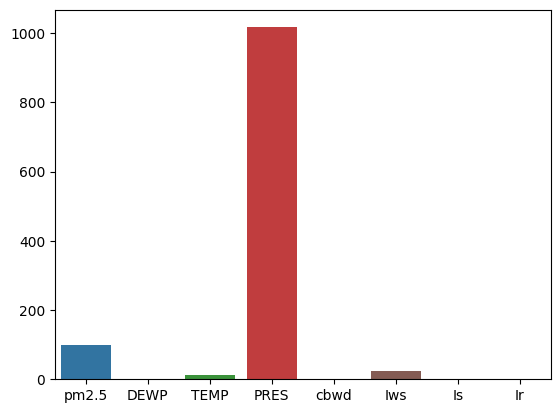

In [ ]:
sns.barplot(df)
plt.show()

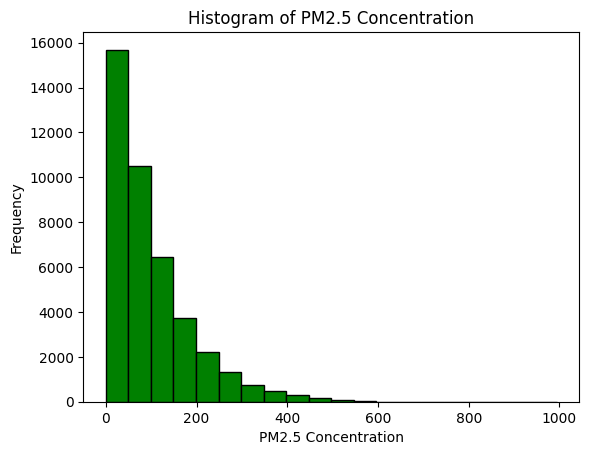

In [ ]:
plt.hist(df['pm2.5'], bins=20,color ='green' ,edgecolor='black')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5 Concentration')
plt.show()

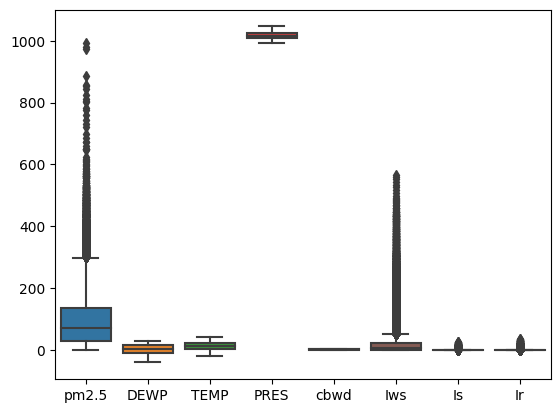

In [ ]:
sns.boxplot(df)
plt.show()

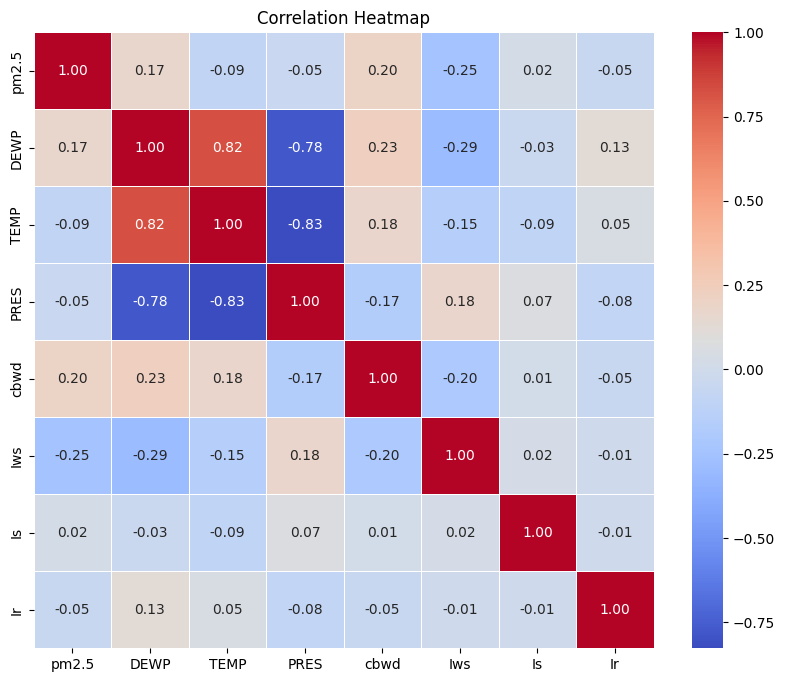

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

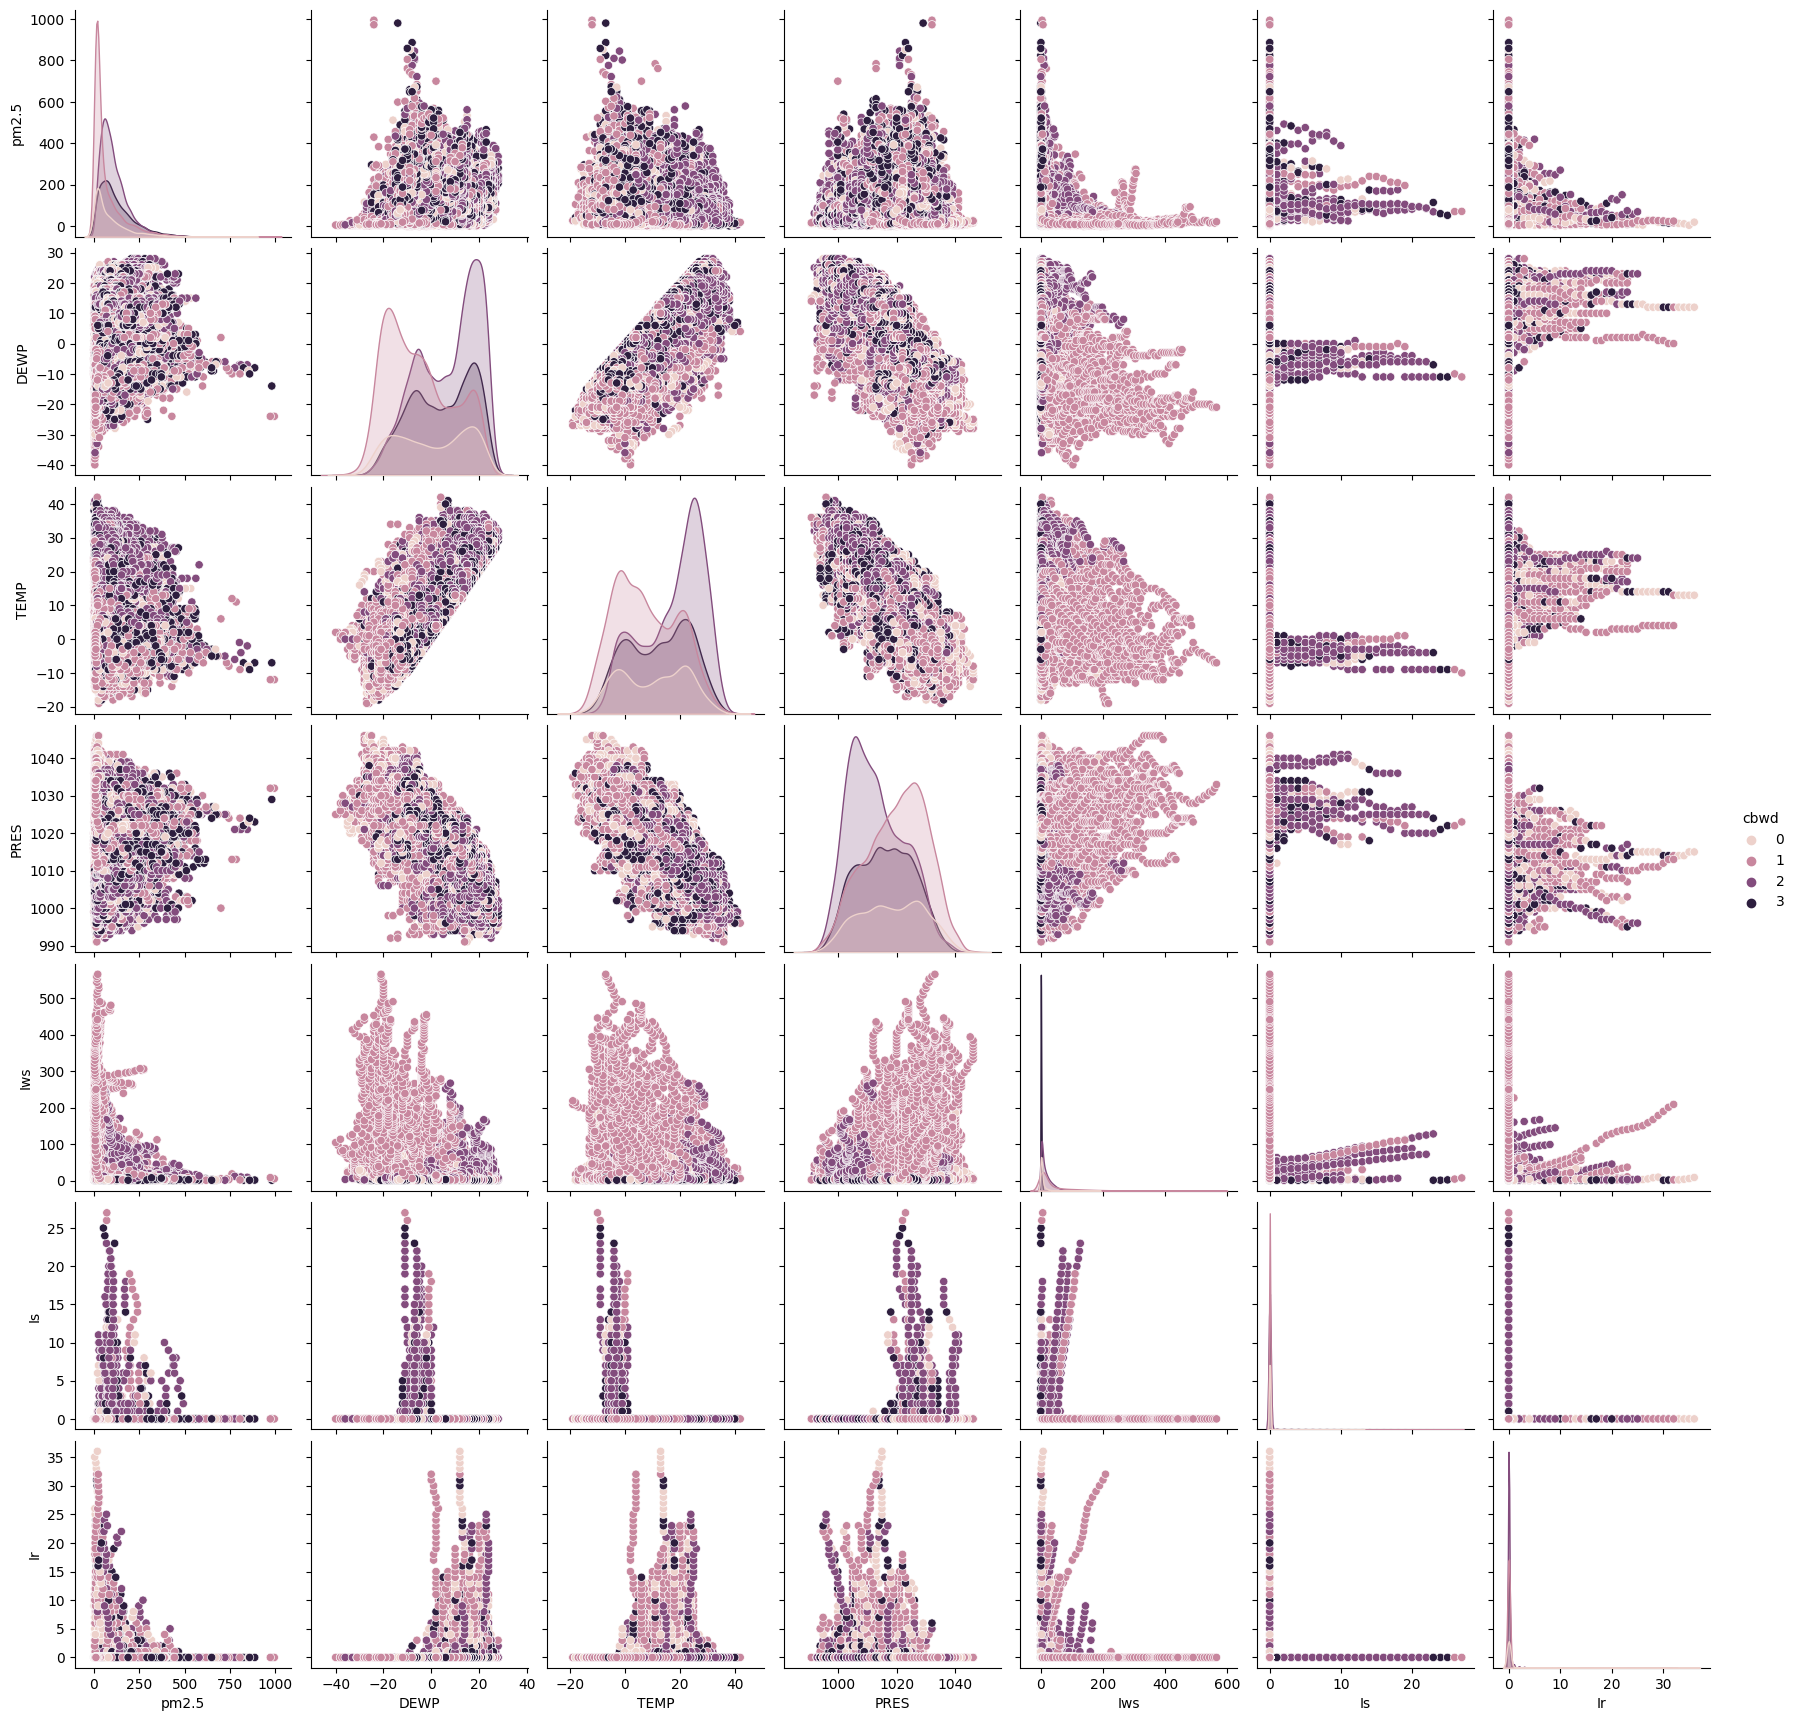

In [ ]:
#Create the pairplot for each class
subset_features =['pm2.5', 'DEWP', 'TEMP', 'PRES','Iws', 'Is', 'Ir']
sns.pairplot(df, vars=subset_features, diag_kind='kde',hue = 'cbwd')
plt.show()

#Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
#feature selection
X = df.drop(columns = ['pm2.5'])
y = df['pm2.5']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Ridge Regressor
ridge_model = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}  # List of alpha values to try

ridge_grid = GridSearchCV(ridge_model, param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best Ridge model
best_ridge_model = ridge_grid.best_estimator_

In [ ]:
# Predictions on the test set
ridge_predictions = best_ridge_model.predict(X_test)

##Model Evaluation

In [ ]:
# Make predictions on training and testing data
ridge_train_predictions = best_ridge_model.predict(X_train)
ridge_test_predictions = best_ridge_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics for Ridge model
ridge_mae_train = mean_absolute_error(y_train, ridge_train_predictions)
ridge_mae_test = mean_absolute_error(y_test, ridge_test_predictions)

ridge_mse_train = mean_squared_error(y_train, ridge_train_predictions)
ridge_mse_test = mean_squared_error(y_test, ridge_test_predictions)

ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_rmse_test = np.sqrt(ridge_mse_test)

In [ ]:
# Print the evaluation metrics
print("Ridge Regressor - MAE (Train/Test):", ridge_mae_train, "/", ridge_mae_test)
print("Ridge Regressor - MSE (Train/Test):", ridge_mse_train, "/", ridge_mse_test)
print("Ridge Regressor - RMSE (Train/Test):", ridge_rmse_train, "/", ridge_rmse_test)

Ridge Regressor - MAE (Train/Test): 57.592572073953576 / 57.7030242651433
Ridge Regressor - MSE (Train/Test): 6278.492225065509 / 6531.666747866103
Ridge Regressor - RMSE (Train/Test): 79.23693725192506 / 80.8187277050691


##Cross Validation & Overfitting

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 10-fold cross-validation for Ridge Regressor
ridge_cv_scores = cross_val_score(best_ridge_model, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_cv_rmse_scores = np.sqrt(-ridge_cv_scores)

In [ ]:
# Calculate the average cross-validation RMSE scores
ridge_cv_rmse_mean = ridge_cv_rmse_scores.mean()

In [ ]:
# Print the average cross-validation RMSE scores
print("Ridge Regressor - Average Cross-Validation RMSE:", ridge_cv_rmse_mean)

Ridge Regressor - Average Cross-Validation RMSE: 79.65868611809668


#Random Forest Regressor

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

rf_grid = GridSearchCV(rf_model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best Random Forest model
best_rf_model = rf_grid.best_estimator_

#Model Evaluation

In [ ]:
# Make predictions on training and testing data
rf_train_predictions = best_rf_model.predict(X_train)
rf_test_predictions = best_rf_model.predict(X_test)


In [ ]:
# Calculate evaluation metrics for Random Forest model
rf_mae_train = mean_absolute_error(y_train, rf_train_predictions)
rf_mae_test = mean_absolute_error(y_test, rf_test_predictions)

rf_mse_train = mean_squared_error(y_train, rf_train_predictions)
rf_mse_test = mean_squared_error(y_test, rf_test_predictions)

rf_rmse_train = np.sqrt(rf_mse_train)
rf_rmse_test = np.sqrt(rf_mse_test)

In [ ]:
# Print the evaluation metrics
print("\nRandom Forest Regressor - MAE (Train/Test):", rf_mae_train, "/", rf_mae_test)
print("Random Forest Regressor - MSE (Train/Test):", rf_mse_train, "/", rf_mse_test)
print("Random Forest Regressor - RMSE (Train/Test):", rf_rmse_train, "/", rf_rmse_test)


Random Forest Regressor - MAE (Train/Test): 32.2771667419103 / 46.717195321685104
Random Forest Regressor - MSE (Train/Test): 2339.9407388331742 / 4952.934408151541
Random Forest Regressor - RMSE (Train/Test): 48.37293394898819 / 70.3770872383302


##Overfitting & CrossValidation checking

In [ ]:
# 10-fold cross-validation for Random Forest Regressor
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='neg_mean_squared_error')
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)

In [ ]:
# Calculate the average cross-validation RMSE scores
ridge_cv_rmse_mean = ridge_cv_rmse_scores.mean()
rf_cv_rmse_mean = rf_cv_rmse_scores.mean()

In [ ]:
# Print the average cross-validation RMSE scores
print("Random Forest Regressor - Average Cross-Validation RMSE:", rf_cv_rmse_mean)

Random Forest Regressor - Average Cross-Validation RMSE: 78.66311743444366
